In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import datetime
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn import utils

## Load Data, Again

In [6]:
df = pd.read_csv('/tmp/rideindego_all.csv')

/Users/leima/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,3,4,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Standard Bikes

We explore the attributes of standard bike and electric bikes separately before we do a combined research.

In [7]:
df_standard = df.loc[df.bike_type == 'standard']
df_standard['date'] = pd.to_datetime(df_standard.date)
df_standard['start_station_id'].fillna(0, inplace=True)

/Users/leima/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/leima/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
df_standard.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station_id,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station_id,start_time,trip_id,trip_route_category,date,hour,weekday,month
0,3640,standard,4.0,39.9384,-75.173271,3064,7/1/2016 0:11,Indego30,30,39.946331,-75.1698,3063.0,7/1/2016 0:07,25183529,One Way,2016-07-01,0,4,7
1,3349,standard,8.0,39.94138,-75.145638,3026,7/1/2016 0:18,Indego30,30,39.95295,-75.139793,3124.0,7/1/2016 0:10,25183528,One Way,2016-07-01,0,4,7
2,5279,standard,17.0,39.933151,-75.162483,3034,7/1/2016 0:28,Indego30,30,39.93082,-75.174744,3043.0,7/1/2016 0:11,25183527,One Way,2016-07-01,0,4,7
3,5198,standard,25.0,39.94138,-75.145638,3026,7/1/2016 0:38,Walk-up,0,39.94138,-75.145638,3026.0,7/1/2016 0:13,25183526,Round Trip,2016-07-01,0,4,7
4,3382,standard,45.0,39.947109,-75.166183,3010,7/1/2016 0:58,Walk-up,0,39.954239,-75.161377,3037.0,7/1/2016 0:13,25183525,One Way,2016-07-01,0,4,7


### Select the Columns of Interest

In [9]:
df_standard.columns.values

array(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'end_station_id', 'end_time', 'passholder_type', 'plan_duration',
       'start_lat', 'start_lon', 'start_station_id', 'start_time',
       'trip_id', 'trip_route_category', 'date', 'hour', 'weekday',
       'month'], dtype=object)

In [10]:
coi = [
    'duration', 'start_station_id', 'passholder_type', 'plan_duration', 
    'trip_route_category', 'date', 'hour', 'weekday', 'month'
]
df_standard = df_standard[coi]

In [11]:
df_standard.describe()

,duration,start_station_id,plan_duration,hour,weekday,month
count,2.637706e+06,2.637706e+06,2.637706e+06,2.637706e+06,2.637706e+06,2.637706e+06
mean,2.267345e+01,3.055892e+03,4.476082e+01,1.388234e+01,2.855778e+00,7.048073e+00
std,6.822291e+01,2.309385e+02,8.026433e+01,4.993990e+00,1.930236e+00,2.934764e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.000000e+00,3.023000e+03,3.000000e+01,1.000000e+01,1.000000e+00,5.000000e+00
50%,1.200000e+01,3.047000e+03,3.000000e+01,1.500000e+01,3.000000e+00,7.000000e+00
75%,1.900000e+01,3.070000e+03,3.000000e+01,1.800000e+01,4.000000e+00,9.000000e+00
max,1.440000e+03,9.001800e+04,3.650000e+02,2.300000e+01,6.000000e+00,1.200000e+01


In [12]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637706 entries, 0 to 2642085
Data columns (total 9 columns):
duration               float64
start_station_id       float64
passholder_type        object
plan_duration          int64
trip_route_category    object
date                   datetime64[ns]
hour                   int64
weekday                int64
month                  int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 201.2+ MB


In [13]:
for i in df_standard.columns:
    print(
        i, ': ',
        df_standard[i].isnull().any()
    )

duration :  False
start_station_id :  False
passholder_type :  False
plan_duration :  False
trip_route_category :  False
date :  False
hour :  False
weekday :  False
month :  False


### Does the Station Matter?

In [14]:
df_groupby_start_station_id = df_standard.groupby('start_station_id')
df_groupby_start_station_id_median = df_groupby_start_station_id.median()

In [15]:
df_groupby_start_station_id_median.sort_values(by='duration', ascending=False).head(10)

,duration,plan_duration,hour,weekday,month
start_station_id,,,,,
3106.0,29.0,30.0,14.0,4.0,7.0
3111.0,28.0,30.0,14.0,4.0,7.0
3186.0,27.0,30.0,15.0,3.0,8.0
3057.0,26.0,1.0,15.0,4.0,7.0
3096.0,24.0,30.0,14.0,3.0,8.0
3109.0,23.0,30.0,13.0,3.0,8.0
3117.0,23.0,30.0,15.0,3.0,7.0
3000.0,22.0,30.0,17.0,4.0,7.0
3188.0,22.0,30.0,16.0,4.0,9.0


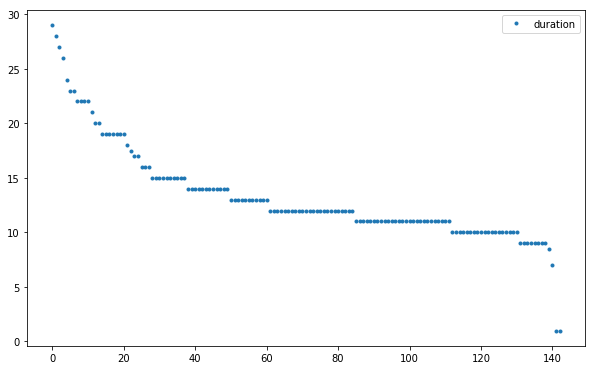

In [16]:
fig, ax=plt.subplots(figsize=(10,6.18))
df_groupby_start_station_id_median[['duration']].sort_values(by='duration', ascending=False).reset_index()[['duration']].plot(ax=ax, style='.')
#ax.set_xlim([2800,3400])

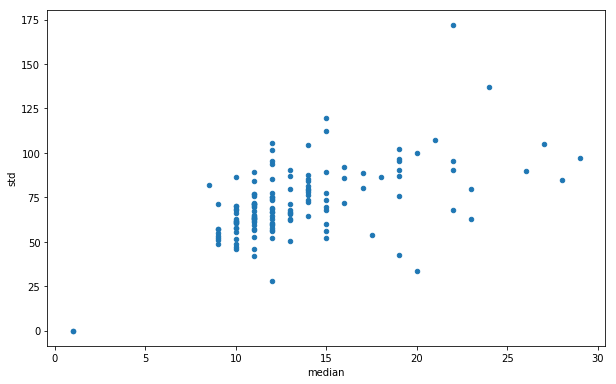

In [17]:
fig, ax=plt.subplots(figsize=(10,6.18))
df_standard.groupby('start_station_id').agg([np.median, np.std])['duration'].plot.scatter(x='median',y='std',ax=ax)

/Users/leima/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


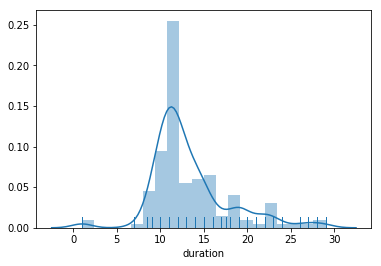

In [18]:
fig, ax = plt.subplots()
sns.distplot(df_groupby_start_station_id_median['duration'], bins=20, rug=True, ax=ax)

/Users/leima/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


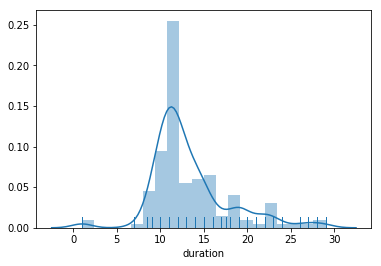

In [19]:
fig, ax = plt.subplots()
sns.distplot(df_groupby_start_station_id_median.loc[df_groupby_start_station_id_median.duration<=100]['duration'], bins=20, rug=True, ax=ax)

In [20]:
df_groupby_start_station_id_median.sort_values(by='duration', ascending=False)['duration'].median()

12.0

Looks interesting. It is most likely to be related to **regions of these bikes** but it requires more explorations on geodata.

### Seasonality

There is no need to convert strings to datetime at this moment since we are just doing a quick test here.

In [21]:
df_standard_date_agg = df_standard.groupby('date')[['duration']].agg([np.median, np.std, np.count_nonzero]).reset_index()

df_standard_date_agg['date'] = pd.to_datetime(df_standard_date_agg.date)

df_standard_date_agg.set_index('date', inplace=True)
df_standard_date_agg.sort_index(inplace=True)

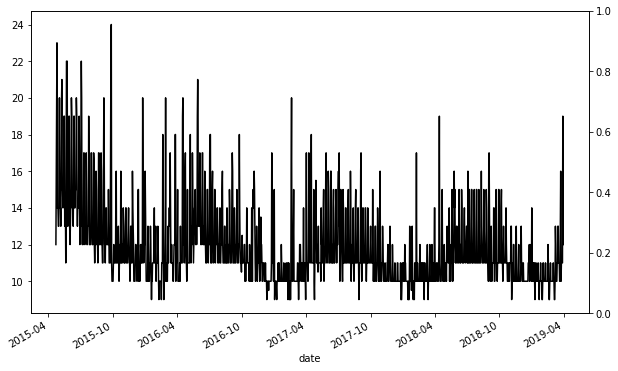

In [22]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard_date_agg.loc[:,('duration','median')].plot(ax=ax, style='k-')
ax2 = ax.twinx()
#df_standard_date_agg.loc[:,('duration','std')].plot(ax=ax2, style='r-')
#ax2.set_ylim([0,200])
#ax.set_xlim([datetime.date(2016,4,1), datetime.date(2019,4,1)])
#ax.set_ylim([0,20])

(736754.0, 736815.0)

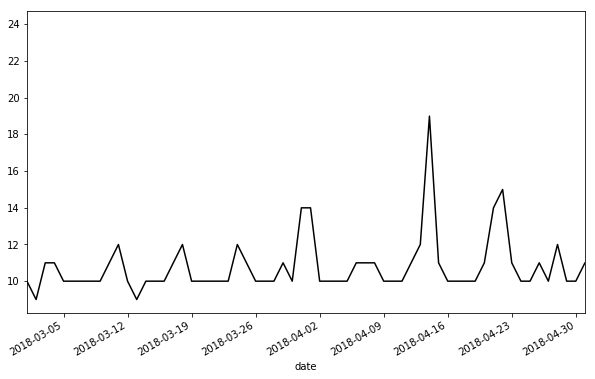

In [23]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard_date_agg.loc[:,('duration','median')].plot(ax=ax, style='k-')
ax.set_xlim([datetime.date(2018,3,1), datetime.date(2018,5,1)])

Of course, summer is the peak season. It is too cold in winter.

### Weekday

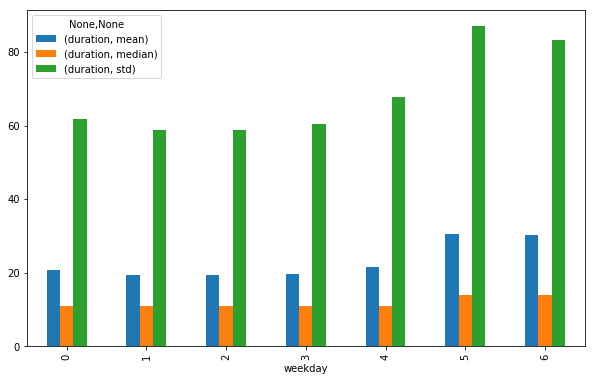

In [24]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard.groupby('weekday')[['duration']].agg([np.mean,np.median,np.std]).plot.bar(ax=ax)

### Month

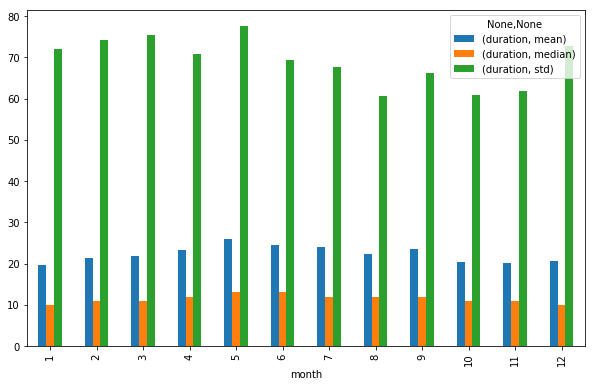

In [25]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard.groupby('month')[['duration']].agg([np.mean,np.median,np.std]).plot.bar(ax=ax)

## user plans

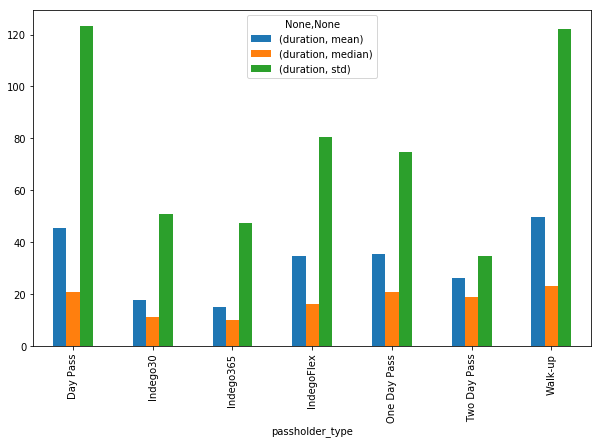

In [26]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard.groupby('passholder_type')[['duration']].agg([np.mean,np.median,np.std]).plot.bar(ax=ax)

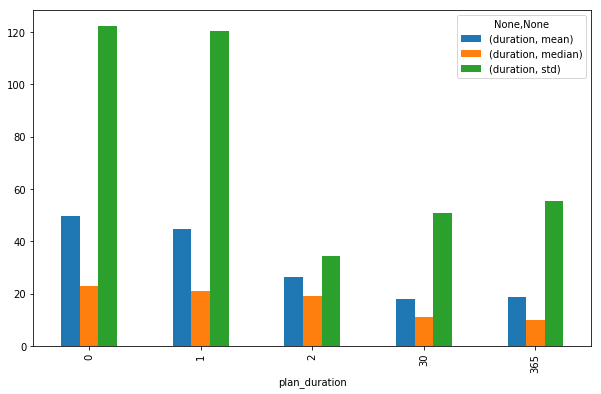

In [27]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard.groupby('plan_duration')[['duration']].agg([np.mean,np.median, np.std]).plot.bar(ax=ax)

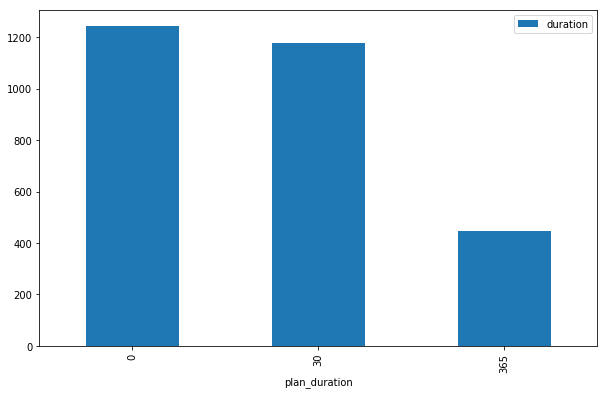

In [28]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard[df_standard.date <= datetime.date(2017,1,1)].groupby('plan_duration')[['duration']].nunique().plot.bar(ax=ax)

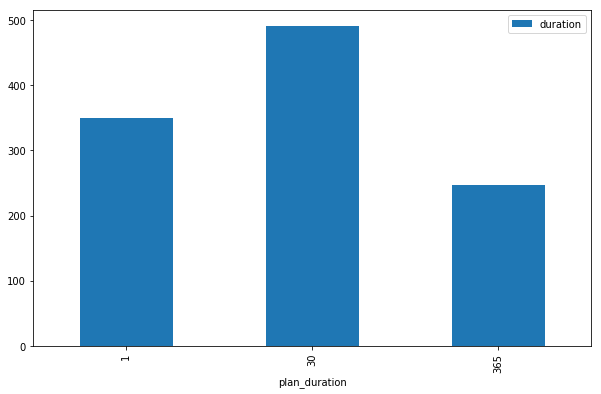

In [29]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard[df_standard.date >= datetime.date(2019,1,1)].groupby('plan_duration')[['duration']].nunique().plot.bar(ax=ax)

I choose to use pass type instead of plan duration.

### Trip Route Cat

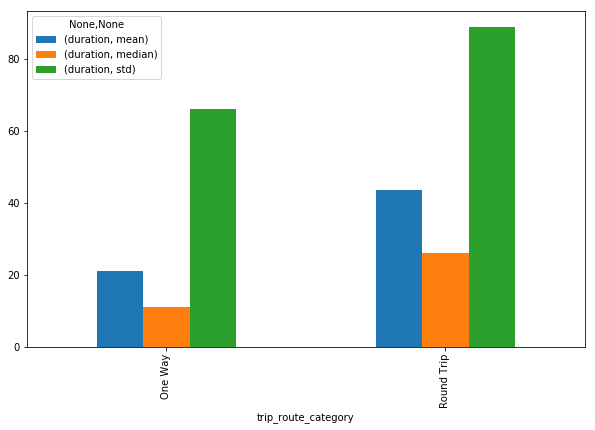

In [30]:
fig, ax = plt.subplots(figsize=(10,6.18))
df_standard.groupby('trip_route_category')[['duration']].agg([np.mean,np.median, np.std]).plot.bar(ax=ax)

### Correlatiosn

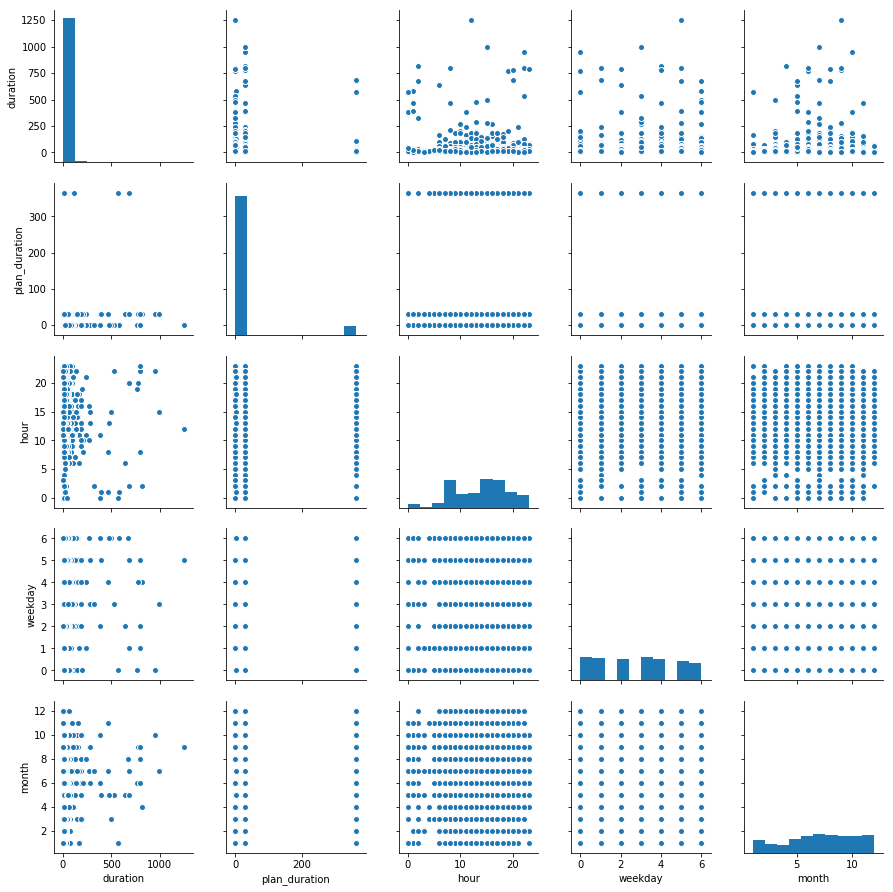

In [31]:
sns.pairplot(df_standard[
    ['duration','plan_duration','hour', 'weekday', 'month']
].sample(frac=0.001))

## Group By

In [32]:
df_standard.drop('date', axis=1).groupby(
    ['start_station_id', 'passholder_type', 'plan_duration', 'trip_route_category','hour', 'weekday','month']
).median()

duration
start_station_id passholder_type plan_duration trip_route_category hour weekday month          
0.0              Indego30        30            One Way             13   2       3          12.0
                                                                   15   5       2          17.0
                                               Round Trip          11   2       1           1.0
                                                                   14   1       1          87.0
                                                                        2       1         169.0
                                                                   15   3       1           3.0
                                                                   16   3       1           7.0
3000.0           Day Pass        1             One Way             6    4       8           8.0
                                                                   7    4       8           1.0
                                                                   12   5       5           9.0
                                                                   16   1       6           2.0
                                                                        4       5           7.0
                                                                   18   5       5          33.0
                 Indego30        30            One Way             0    5       5          27.0
                                                                   1    5       5          26.0
                                                                   6    3       10         34.0
                                                                        4       5          11.0
                                                                   7    1       10         60.0
                                                                        4       5          13.0
                                                                        5       5         141.0
                                                                   8    3       10         12.0
                                                                        4       5          14.0
                                                                                8           5.0
                                                                   9    0       4          22.0
                                                                        1       8          26.0
                                                                        3       10         23.0
                                                                        4       5          10.5
                                                                        5       8           9.0
                                                                                10         57.0
                                                                   10   2       12          5.0
...                                                                                         ...
3192.0           Indego365       365           Round Trip          10   4       12          3.0
                                                                   12   1       12          7.0
                                                                   13   3       12          5.0
                                                                   15   0       12          5.0
                                                                   20   4       3           1.0
                                                                        6       12          4.0
                 IndegoFlex      365           One Way             12   4       8          18.0
                                                                        5       8          10.5
                                                                   14   3       9          50.0
                                                       

## models

In [33]:
df_standard.columns

Index(['duration', 'start_station_id', 'passholder_type', 'plan_duration',
       'trip_route_category', 'date', 'hour', 'weekday', 'month'],
      dtype='object')

In [34]:
coi_2 = ['duration', 'passholder_type', 'trip_route_category', 'hour', 'weekday', 'month']
df_standard_explore = df_standard[coi_2]
df_standard_explore = df_standard_explore.sample(frac=1, replace=True, random_state=42)

In [35]:
df_standard_explore.describe()

,duration,hour,weekday,month
count,2.637706e+06,2.637706e+06,2.637706e+06,2.637706e+06
mean,2.265116e+01,1.387856e+01,2.853650e+00,7.048771e+00
std,6.799620e+01,4.996616e+00,1.930313e+00,2.935041e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.000000e+00,1.000000e+01,1.000000e+00,5.000000e+00
50%,1.200000e+01,1.500000e+01,3.000000e+00,7.000000e+00
75%,1.900000e+01,1.800000e+01,4.000000e+00,9.000000e+00
max,1.440000e+03,2.300000e+01,6.000000e+00,1.200000e+01


In [36]:
df_standard_explore.head()

,duration,passholder_type,trip_route_category,hour,weekday,month
2221159,11.0,Indego30,One Way,17,6,8
2231133,11.0,Indego30,One Way,9,3,8
2359794,2.0,Indego30,Round Trip,19,1,2
1694792,6.0,Indego365,One Way,15,0,6
110268,6.0,Indego30,One Way,9,6,8


In [37]:
coi_X = ['passholder_type', 'trip_route_category', 'hour', 'weekday', 'month']
coi_y = ['duration']

In [38]:
scaler = StandardScaler()

In [ ]:
df_standard_explore_X = pd.get_dummies(df_standard_explore[coi_X].astype(str))
df_standard_explore_y = df_standard_explore[coi_y]
df_standard_explore_y = scaler.fit_transform(df_standard_explore_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_standard_explore_X, df_standard_explore_y,
    test_size=0.3, random_state=42
    #,stratify=Y
)

In [ ]:
X_train.describe()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
linear_model = LinearRegression(normalize=True)

In [ ]:
linear_model.fit(X_train, y_train)

In [ ]:
linear_model.score(X_test, y_test)

In [ ]:
linear_model.coef_

In [ ]:
ridge_model = Ridge(alpha=1.0)

In [ ]:
ridge_model.fit(X_train, y_train)

In [ ]:
ridge_model.score(X_test, y_test)

In [ ]:
ridge_model.coef_

In [ ]:
X_train.columns

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_regressor = DecisionTreeRegressor() 

In [ ]:
dt_regressor.fit(X_train, y_train)

In [ ]:
dt_regressor_y_pred = dt_regressor.predict(X_test)  

In [ ]:
dt_regressor_y_pred

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_regressor_y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_regressor_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_regressor_y_pred))) 

In [ ]:
fig, ax = plt.subplots(figsize=(10,6.18))
ax.plot( y_test, dt_regressor_y_pred, 'k.')
ax.set_xlim([0,100])
ax.set_ylim([0,100])

## DTRegressor LabelEncoder

In [ ]:
df_standard.columns

In [ ]:
df_standard_dt_coi = [
    'duration', 'passholder_type', 'start_station_id', 'trip_route_category', 
    'hour', 'weekday', 'month']
df_standard_dt = df_standard[df_standard_dt_coi]

In [ ]:
encoding_coi = [
    'passholder_type', 'start_station_id', 'trip_route_category'
]
les = []

for i in encoding_coi:
    i_encoder = LabelEncoder()
    i_encoder.fit_transform(df_standard_dt[i])
    df_standard_dt = df_standard_dt.apply(
        i_encoder.fit_transform
    )
    les.append(i_encoder)
    print(f'{i}')

In [ ]:
df_standard_dt.head()

In [ ]:
df_standard_dt_X = df_standard_dt.drop(['duration'], axis=1)
df_standard_dt_y = df_standard_dt[['duration']]
df_standard_dt_y = scaler.fit_transform(df_standard_dt_y)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df_standard_dt_X, df_standard_dt_y,
    test_size=0.3, random_state=42
    #,stratify=Y
)

In [ ]:
dt_regressor_2 = DecisionTreeRegressor() 

In [ ]:
dt_regressor_2.fit(X_train_2, y_train_2)

In [ ]:
dt_regressor_y_pred_2 = dt_regressor_2.predict(X_test_2)  

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, dt_regressor_y_pred_2)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, dt_regressor_y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, dt_regressor_y_pred_2))) 

Not working either.

## Why does Treebased fail?

In [ ]:
df_standard_inspect = df_standard[df_standard_dt_coi].groupby([
 'passholder_type',
 'start_station_id',
 'trip_route_category',
 'hour',
 'weekday',
 'month']).agg([np.median, np.mean, np.std, len])[['duration']]

In [ ]:
fig, ax = plt.subplots()
ax.plot(
    df_standard_inspect.loc[:, ('duration','median')].values, df_standard_inspect.loc[:, ('duration','std')].values,
    'k.'
)
ax.set_xlim([0,200])
ax.set_ylim([0,200])

**bad feature engineering/need more dimensions**

## Classification

Try classifications using svm

In [ ]:
df_standard_classification = df_standard_dt.copy()

In [ ]:
df_standard_classification['duration'] = df_standard_classification.duration.apply(
    lambda x: int(float(x/10))
)

In [ ]:
df_standard_classification.duration.agg([np.mean, np.median])

In [ ]:
encoding_coi = [
    'passholder_type', 'start_station_id', 'trip_route_category', 'duration'
]
les = []

for i in encoding_coi:
    i_encoder = LabelEncoder()
    i_encoder.fit_transform(df_standard_classification[i])
    df_standard_classification = df_standard_classification.apply(
        i_encoder.fit_transform
    )
    les.append(i_encoder)
    print(f'{i}')

```
df_standard_classification_y_le = LabelEncoder()
df_standard_classification_y = df_standard_classification_y_le.fit_transform(
    df_standard_classification_y
)
```

```
utils.multiclass.type_of_target(
    df_standard_classification_y
)
```

In [ ]:
df_standard_classification_X = df_standard_classification.drop(['duration'], axis=1)
df_standard_classification_y = df_standard_classification[['duration']]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    df_standard_classification_X, df_standard_classification_y,
    test_size=0.3, random_state=42
    #,stratify=Y
)

In [ ]:
utils.multiclass.type_of_target(y_train_3)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svclassifier = SVC(kernel='linear')

In [ ]:
svclassifier.fit(X_train_3, y_train_3)